# Customer Churn Prediction Model Using Artificial Neural Network (ANN)

# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading csv file

In [2]:
df = pd.read_csv(r"C:\Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
192,2984-RGEYA,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1375.4,No
184,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
2167,9061-TIHDA,Male,1,Yes,No,13,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,1233.65,Yes
4842,5707-ORNDZ,Male,1,No,No,9,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.55,494.05,Yes
860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


# cleaning the data

In [4]:
df.drop('customerID' , axis = 'columns' , inplace = True)

In [5]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5768,Male,0,Yes,No,44,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),90.65,3974.15,No
4810,Female,1,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.85,1424.95,Yes
3067,Male,0,No,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.40,556.35,Yes
6774,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
6883,Female,0,No,Yes,34,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.35,3688.6,No


In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Remove rows with space in TotalCharges

In [8]:
df[df.TotalCharges!=' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
225,Male,0,No,No,24,No,No phone service,DSL,Yes,No,No,No,Yes,Yes,One year,Yes,Mailed check,50.60,1288.75,No
737,Male,0,Yes,No,70,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.00,7085.5,No
6079,Female,0,Yes,No,25,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.10,1373,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
5833,Male,1,Yes,No,19,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),34.30,577.15,No


In [10]:
df.TotalCharges.dtype

dtype('O')

In [11]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Data Visualization

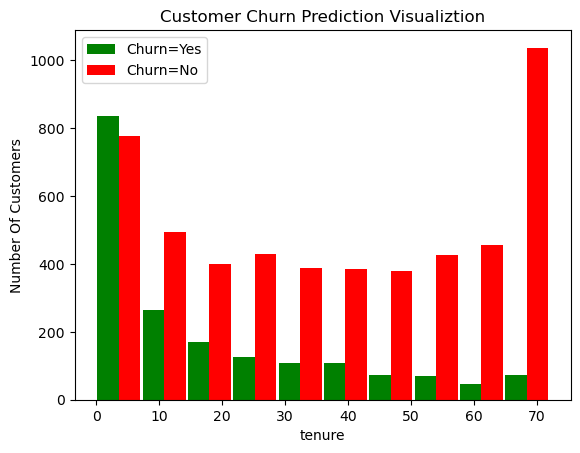

In [13]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

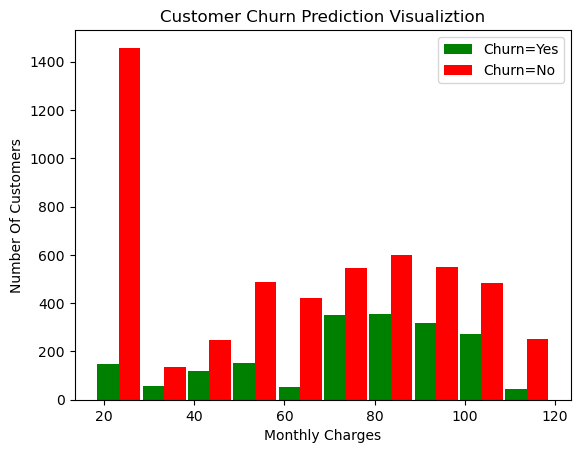

In [14]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [16]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [17]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [18]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


# Convert Yes and No to 1 or 0

In [19]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [20]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


# Convert Male and Female to 1 or 0

In [21]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)

In [22]:
df.gender.unique()

array([0, 1], dtype=int64)

In [23]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


# One-Hot Encoding for categorical columns

In [24]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3420,0,0,0,0,26,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
6156,0,1,0,0,26,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
2188,0,0,0,0,29,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1452,1,1,0,0,52,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6495,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# scaling the range from 0-1

In [26]:
from sklearn.preprocessing import MinMaxScaler

df1['TotalCharges'] = df1['TotalCharges'].replace(' ', np.nan).astype(float)
df1['TotalCharges'].fillna(df1['TotalCharges'].mean(), inplace=True)

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

# Train-Test split

In [28]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
X_train.shape

(5634, 26)

In [30]:
X_test.shape

(1409, 26)

In [31]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,0,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2458,1,1,1,0,0.694444,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5879,1,0,1,0,0.458333,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
4708,0,0,1,1,0.777778,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1293,1,0,1,1,0.930556,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
2242,1,0,1,1,0.611111,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1444,1,0,0,1,0.569444,1,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
3269,1,0,0,0,0.902778,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
101,0,0,1,1,0.013889,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4191,0,0,1,0,0.875000,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


# Build a model (ANN) in tensorflow/keras

G:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7189 - loss: 0.5546
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4190
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4194
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.4118
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4149
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4172
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4141
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.4013
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4057
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4038
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4070
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

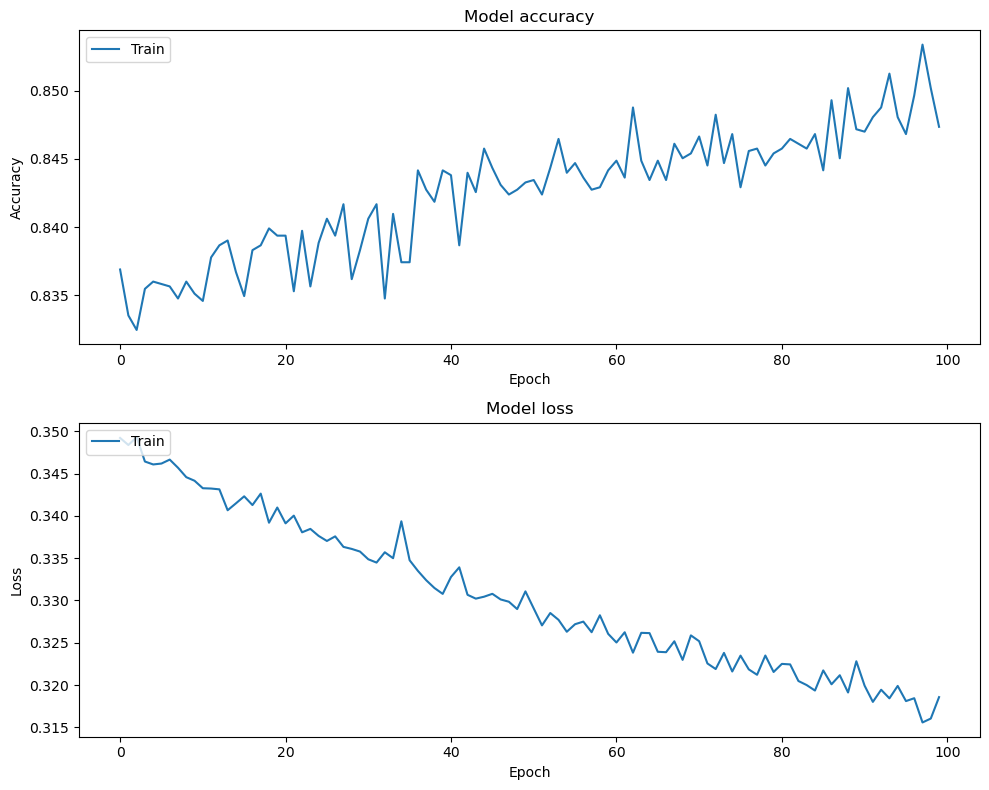

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)





history = model.fit(X_train, y_train, epochs=100)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(history.history['accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7563 - loss: 0.6411


[0.6017450094223022, 0.760113537311554]

In [36]:
yp = model.predict(X_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.6605867 ],
       [0.39537668],
       [0.20790988],
       [0.9844951 ],
       [0.07870712]], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[1, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [39]:
y_test[:10]

4213    1
5035    0
3713    1
1720    0
234     0
4558    1
40      0
3455    1
5944    1
1089    0
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1023
           1       0.56      0.54      0.55       386

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.76      0.76      1409



Text(95.72222222222221, 0.5, 'Truth')

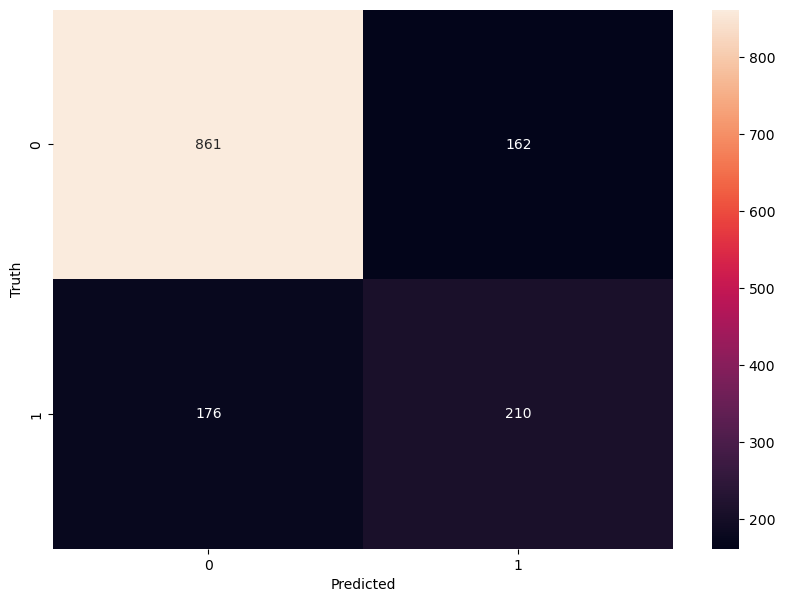

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Accuracy

In [1]:
round((861+210)/(861+210+176+162),2)

0.76

# Precision for 0 class (Precision for customers who did not churn)

In [2]:
round(861/(861+176),2)

0.83

# Precision for 1 class (Precision for customers who actually churn)

In [3]:
round(210/(210+162),2)

0.56

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.5679
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.5237
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.4698
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4183
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4331
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7791 - loss: 0.4601
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.4195
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.3907
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.4075
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4076
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.4366
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8118 - lo

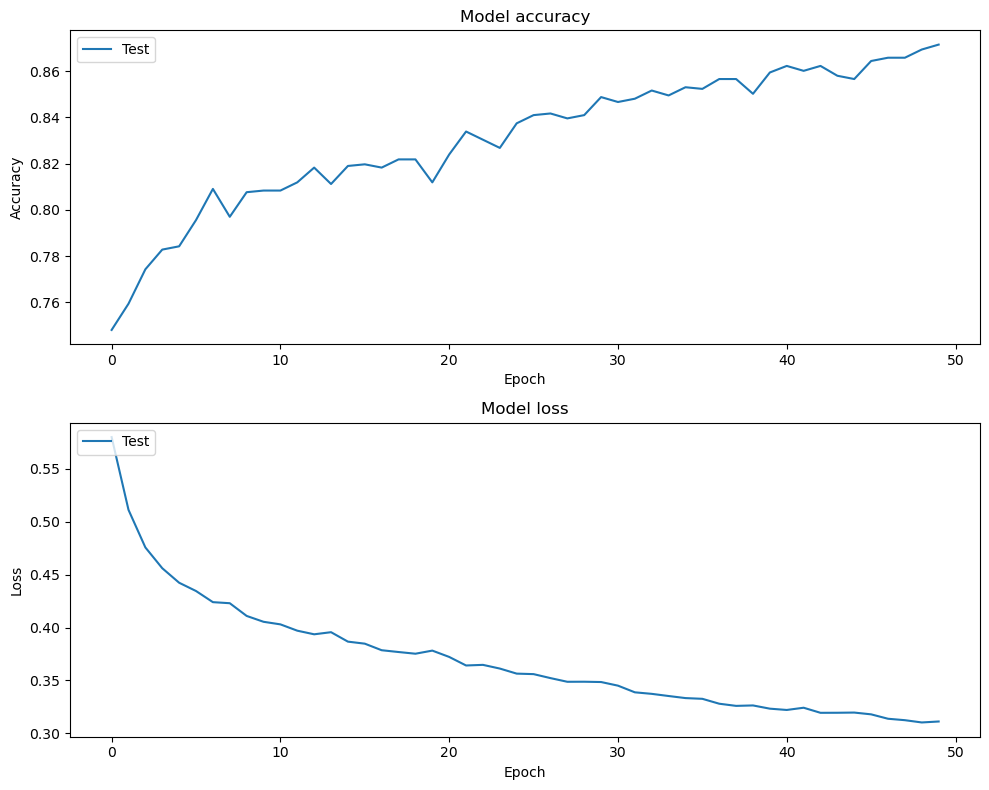

In [45]:
history = model.fit(X_test, y_test, epochs=50)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(history.history['accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Test'], loc='upper left')

plt.tight_layout()
plt.show()